In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path="D:\\MACHINE LEARNING\\CLUSTERING\\PROJECTS\\DATASETS\\userbehaviour.csv"
app_df=pd.read_csv(file_path)
app_df

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed
...,...,...,...,...,...,...,...,...
994,1995,38.0,938.0,0,5,4,1865,Installed
995,1996,43.0,61.0,0,6,8,1327,Installed
996,1997,47.0,761.0,0,6,1,1936,Installed
997,1998,6.0,73.0,1,5,1,3436,Installed


In [3]:
#basic analysis

In [4]:
app_df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [5]:
app_df.tail()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
994,1995,38.0,938.0,0,5,4,1865,Installed
995,1996,43.0,61.0,0,6,8,1327,Installed
996,1997,47.0,761.0,0,6,1,1936,Installed
997,1998,6.0,73.0,1,5,1,3436,Installed
998,1999,9.0,54.0,0,4,2,4039,Installed


In [6]:
app_df.size

7992

In [7]:
app_df.shape

(999, 8)

In [8]:
app_df.columns

Index(['userid', 'Average Screen Time', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes', 'Status'],
      dtype='object')

In [9]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [10]:
app_df.isnull().sum()

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [11]:
#no null values

In [12]:
#categorical vs numerical columns
categorical_columns=[]
numerical_columns=[]
for i,j in dict(app_df.dtypes).items():
    if j=="O":
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)


In [13]:
categorical_columns

['Status']

In [14]:
keys=app_df["Status"].value_counts().keys()
values=app_df["Status"].value_counts().values
value_p=app_df["Status"].value_counts(normalize=True).values
status=pd.DataFrame(zip(keys,values),columns=["status","count"])
status

,status,count
0,Installed,916
1,Uninstalled,83


<BarContainer object of 2 artists>

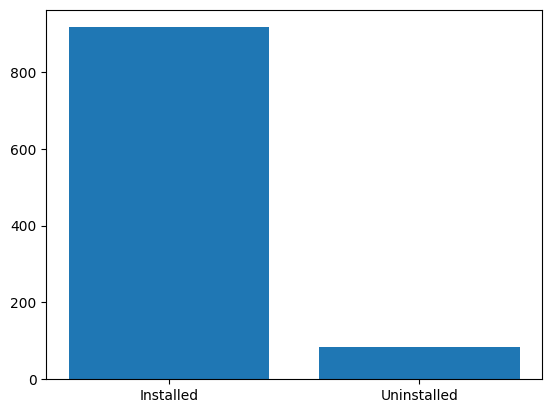

In [15]:
plt.bar("status","count",data=status)

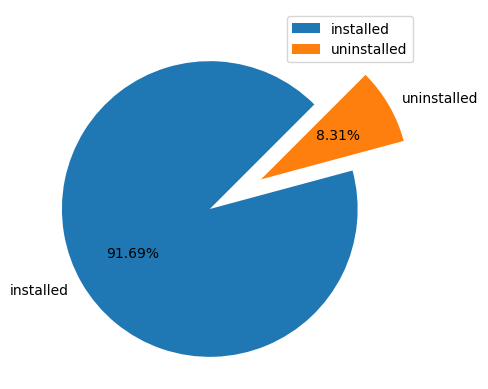

In [16]:
plt.pie(value_p,explode=[0.2,0.2],autopct="%.2f%%",startangle=45,labels=["installed","uninstalled"])
plt.legend(labels=["installed","uninstalled"])
plt.show()

In [17]:
#working on numerical columns

In [18]:
app_df.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


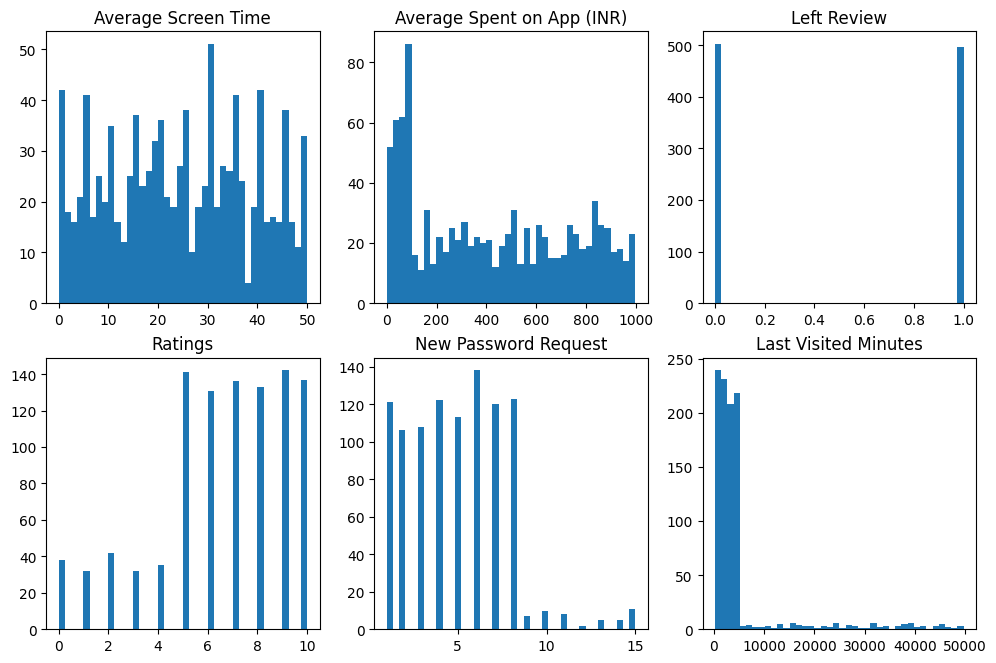

In [19]:
plt.figure(figsize=(12,12))
for index,columns in enumerate(numerical_columns[1:]):
    plt.subplot(3,3,index+1)
    plt.title(columns)
    plt.hist(app_df[columns],bins=40)
    

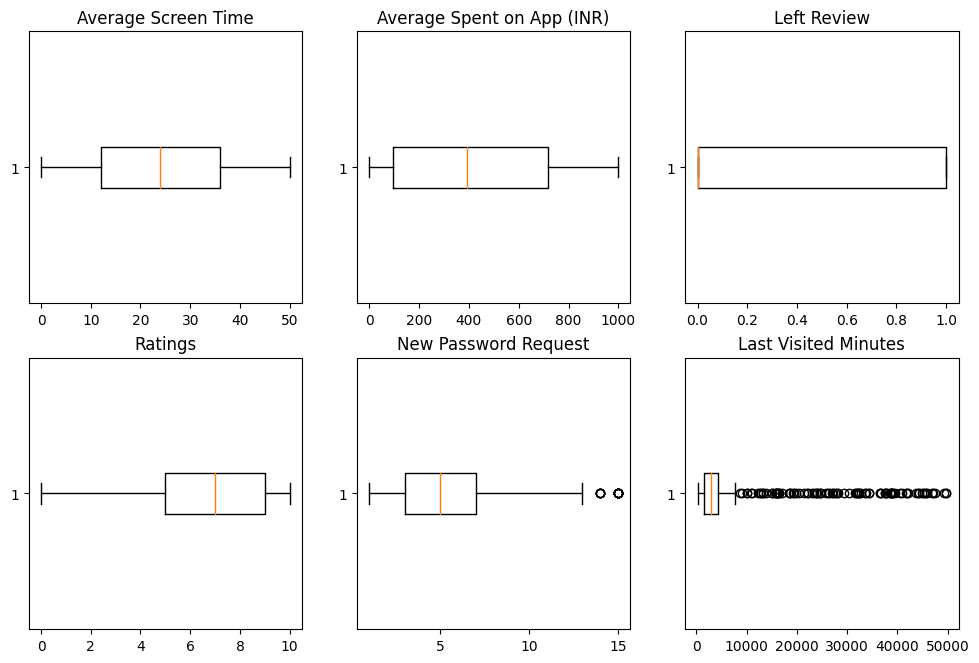

In [20]:
plt.figure(figsize=(12,12))
for index,columns in enumerate(numerical_columns[1:]):
    plt.subplot(3,3,index+1)
    plt.title(columns)
    plt.boxplot(app_df[columns],vert=False)
    

In [21]:
#correlation

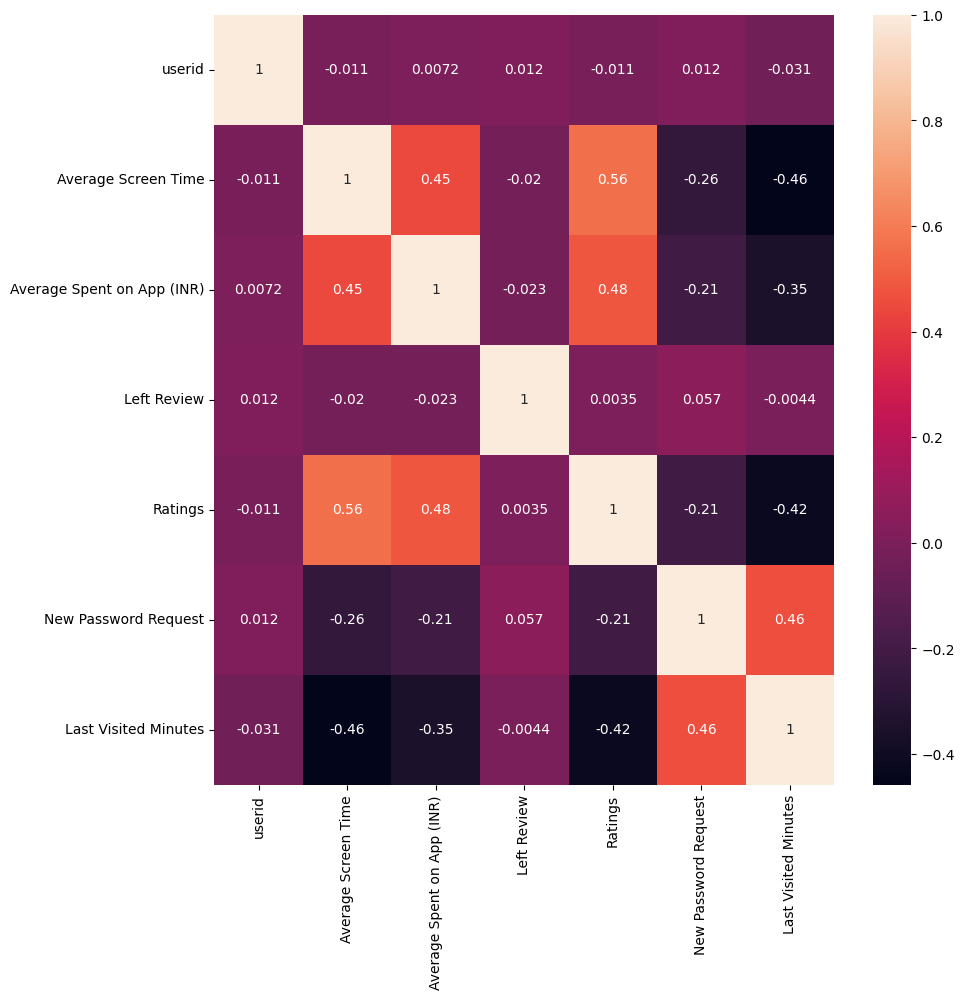

In [22]:
corr_data=app_df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr_data,annot=True)
plt.show()

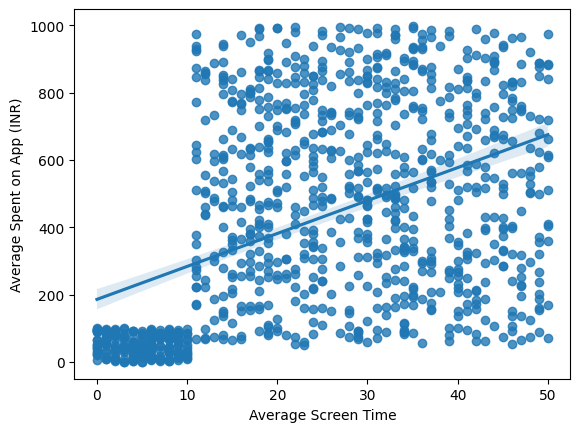

In [23]:
sns.regplot(x=app_df["Average Screen Time"], y=app_df['Average Spent on App (INR)'],data=app_df);

In [24]:
app_df.columns

Index(['userid', 'Average Screen Time', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes', 'Status'],
      dtype='object')

C:\Users\Venkatesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


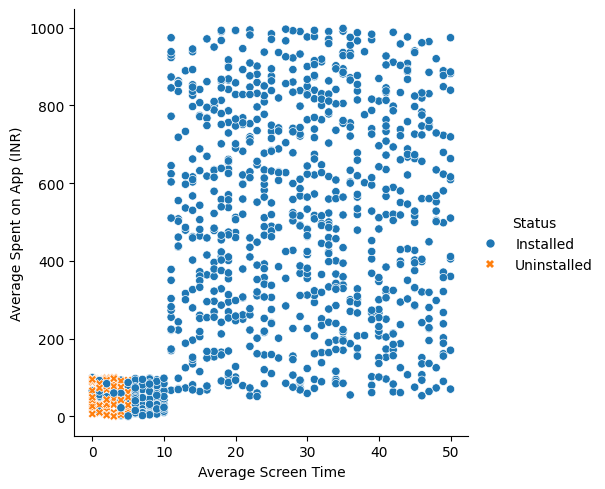

In [25]:
sns.relplot(
    data=app_df,
    x=app_df["Average Screen Time"], y=app_df['Average Spent on App (INR)'],
    hue=app_df["Status"], style=app_df["Status"]
)

C:\Users\Venkatesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


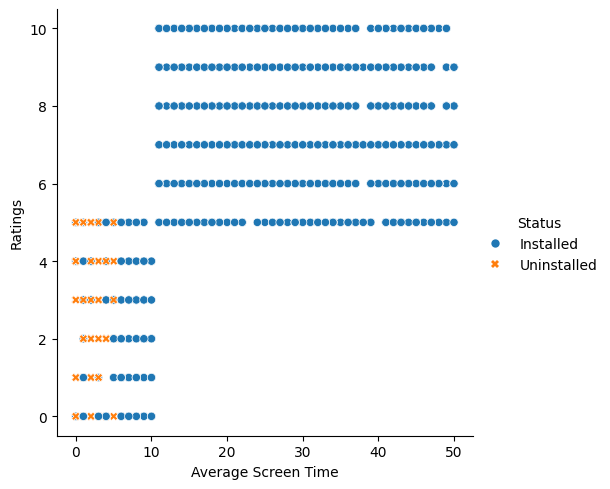

In [26]:
sns.relplot(
    data=app_df,
    x=app_df["Average Screen Time"], y=app_df['Ratings'],
    hue=app_df["Status"], style=app_df["Status"]
)

In [27]:
#converting status column

In [28]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
app_df["Status"]=LE.fit_transform(app_df["Status"])

In [29]:
app_df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,0
1,1002,0.0,54.0,0,4,8,24008,1
2,1003,37.0,207.0,0,8,5,971,0
3,1004,32.0,445.0,1,6,2,799,0
4,1005,45.0,427.0,1,5,6,3668,0


In [30]:
app_df=app_df.drop("userid",axis=1)
app_df

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,17.0,634.0,1,9,7,2990,0
1,0.0,54.0,0,4,8,24008,1
2,37.0,207.0,0,8,5,971,0
3,32.0,445.0,1,6,2,799,0
4,45.0,427.0,1,5,6,3668,0
...,...,...,...,...,...,...,...
994,38.0,938.0,0,5,4,1865,0
995,43.0,61.0,0,6,8,1327,0
996,47.0,761.0,0,6,1,1936,0
997,6.0,73.0,1,5,1,3436,0


In [31]:
#using the min max scalar convert all the columns

In [32]:
from sklearn.preprocessing import MinMaxScaler
for i in app_df:
    MM=MinMaxScaler()
    app_df[i]=MM.fit_transform(app_df[[i]])

In [33]:
app_df

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,0.34,0.635271,1.0,0.9,0.428571,0.056328,0.0
1,0.00,0.054108,0.0,0.4,0.500000,0.480814,1.0
2,0.74,0.207415,0.0,0.8,0.285714,0.015551,0.0
3,0.64,0.445892,1.0,0.6,0.071429,0.012077,0.0
4,0.90,0.427856,1.0,0.5,0.357143,0.070021,0.0
...,...,...,...,...,...,...,...
994,0.76,0.939880,0.0,0.5,0.214286,0.033607,0.0
995,0.86,0.061122,0.0,0.6,0.500000,0.022741,0.0
996,0.94,0.762525,0.0,0.6,0.000000,0.035041,0.0
997,0.12,0.073146,1.0,0.5,0.000000,0.065335,0.0


In [34]:
#spliting the data

In [35]:
X=app_df.drop("Status",axis=1).values


In [36]:
from sklearn.cluster import KMeans
KM=KMeans()
KM.fit(X)

C:\Users\Venkatesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [37]:
KM.inertia_

114.47796146920533

In [38]:
KM.cluster_centers_

array([[ 5.90510204e-01,  7.69631099e-01, -5.55111512e-16,
         7.58673469e-01,  2.39067055e-01,  4.94217055e-02],
       [ 1.37142857e-01,  4.96577571e-02,  1.00000000e+00,
         2.42857143e-01,  2.71799629e-01,  7.42043835e-02],
       [ 4.42105263e-02,  6.41282565e-02,  5.55111512e-17,
         2.23684211e-01,  6.56015038e-01,  6.50243525e-01],
       [ 1.57974684e-01,  8.82778215e-02, -1.66533454e-16,
         3.01265823e-01,  2.30560579e-01,  9.03912613e-02],
       [ 5.89946524e-01,  7.73654260e-01,  1.00000000e+00,
         7.61497326e-01,  2.44079450e-01,  4.79672038e-02],
       [ 4.47368421e-02,  4.05020567e-02,  1.00000000e+00,
         2.94736842e-01,  6.31578947e-01,  6.53063036e-01],
       [ 6.23386243e-01,  3.00627710e-01, -6.10622664e-16,
         7.69841270e-01,  2.41874528e-01,  4.56278412e-02],
       [ 6.00102564e-01,  2.96038230e-01,  1.00000000e+00,
         7.78974359e-01,  2.82051282e-01,  4.82163553e-02]])

In [39]:
import warnings

warnings.filterwarnings('ignore')

wss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,max_iter=300,random_state=1234)
    kmeans.fit(X)
    wss.append(round(kmeans.inertia_,2))

In [40]:
wss

[570.78, 320.82, 236.82, 182.43, 160.43, 138.51, 126.48, 117.27, 105.27]

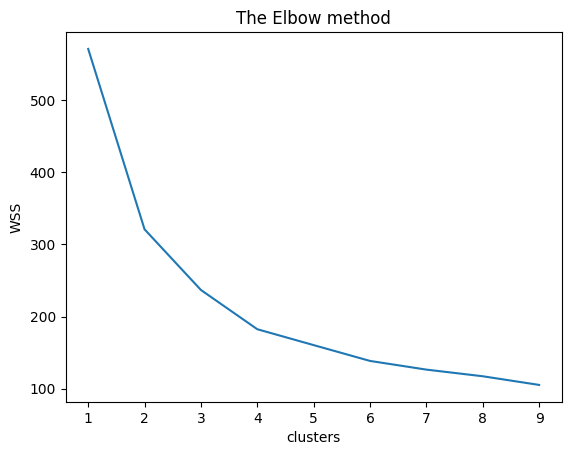

In [41]:
plt.plot(range(1,10),wss)
plt.title("The Elbow method")
plt.xlabel("clusters")
plt.ylabel("WSS")
plt.show()

In [42]:
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_clusters=kmeans.fit_predict(X) # which data point belongs to which cluster
y_clusters


array([0, 1, 2, 3, 3, 2, 0, 1, 0, 3, 0, 3, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 3, 2, 2, 1, 3, 2, 0, 0, 4, 2, 3, 1, 1, 1, 3, 2, 0, 2, 1,
       2, 3, 4, 2, 2, 0, 0, 2, 3, 0, 2, 0, 2, 2, 2, 3, 2, 1, 2, 3, 4, 2,
       3, 0, 4, 4, 2, 2, 2, 0, 1, 3, 0, 2, 3, 2, 2, 0, 2, 0, 2, 2, 4, 2,
       4, 0, 1, 2, 2, 4, 2, 3, 4, 4, 2, 4, 2, 4, 2, 2, 4, 0, 2, 0, 0, 1,
       1, 1, 2, 2, 4, 0, 2, 2, 1, 2, 3, 4, 4, 3, 0, 2, 2, 2, 2, 3, 2, 2,
       4, 2, 3, 2, 4, 3, 1, 2, 2, 1, 2, 2, 4, 0, 4, 2, 0, 0, 4, 2, 0, 3,
       4, 2, 3, 0, 1, 2, 0, 3, 3, 3, 2, 3, 0, 0, 2, 3, 2, 3, 3, 1, 2, 2,
       1, 2, 2, 4, 1, 4, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 4, 3, 2, 4,
       1, 0, 0, 2, 1, 2, 2, 3, 4, 3, 2, 0, 0, 2, 1, 3, 4, 3, 3, 3, 0, 1,
       1, 3, 2, 0, 0, 3, 2, 4, 3, 3, 3, 3, 2, 4, 4, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 3, 0, 0, 1, 3, 2, 2, 0, 0, 0, 2,
       1, 3, 2, 4, 3, 2, 3, 3, 2, 3, 1, 3, 4, 2, 2, 2, 0, 2, 4, 0, 3, 3,
       2, 2, 0, 2, 0, 4, 2, 3, 3, 3, 2, 3, 2, 2, 3,

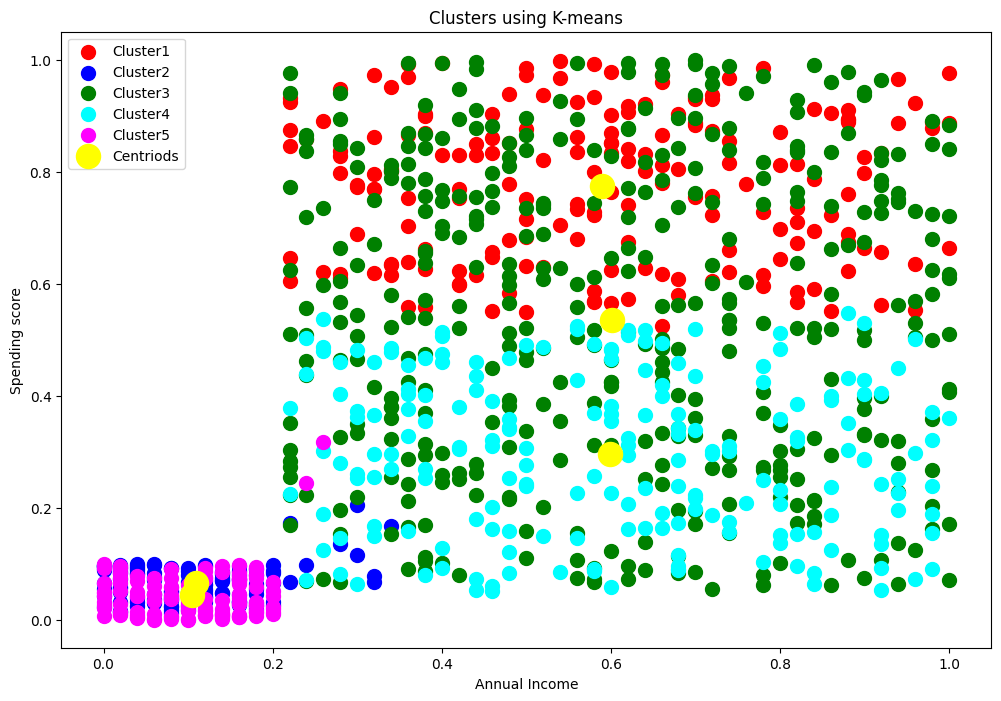

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_clusters==1,0],X[y_clusters==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_clusters==2,0],X[y_clusters==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_clusters==3,0],X[y_clusters==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_clusters==4,0],X[y_clusters==4,1],s=100,c='magenta',label="Cluster5")
#plt.scatter(X[y_clusters==5,0],X[y_clusters==5,1],s=100,c='cyan',label="Cluster6")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.title("Clusters using K-means")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()